# The Sparks Foundation - #gripapr21

# Done by: Vaibhava Bollapragada

#Problem: To Predict the percentage score of a student based on the no. of study hours.
#Details of the problem: This comes under Supervised Machine Learning. We fit the given data by Simple Linear Regression model as it contains only one independent variable(study hours) and predict the new score when new value for the study hour is given.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
data.shape #To check whether all attributes(columns)and instances(rows)are read properly

(25, 2)

In [4]:
data.dtypes #To know the datatypes of attributes

Hours     float64
Scores      int64
dtype: object

In [5]:
data.head() #displays first five rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#descriptive statistics
data.describe()  

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#checking for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values in the given dataset

In [8]:
#correlation between variables
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


From the above correlation coefficients values we can tell that there is a positive correlation between study hours and scores

In [9]:
#preparing the data
x=data.iloc[:, :-1].values
y=data.iloc[:, -1].values

In [10]:
print(x)
x.shape

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


(25, 1)

x represents a 2d array

In [11]:
print(y)
y.shape

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


(25,)

y represents 1d array

In [12]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [13]:
#training the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#making predictions
y_predicted=regressor.predict(x_test)
print(y_predicted)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [15]:
#Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

0.9454906892105356

We got accuracy of 94.54% for the fitted model. We use this model to predict the unknown value

In [16]:
#predict new value of hours
x_new=9.25
y_new=regressor.predict([[9.25]])
y_new

array([93.69173249])

For the given new value of hours i.e 9.25 we got the predicted value of score i.e 93.69 
If a student studies for 9.25 hours he will be getting 93.69 percent

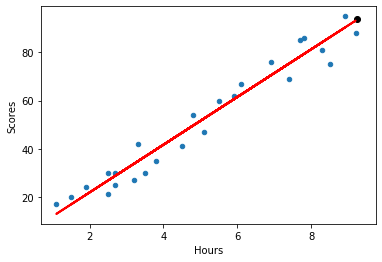

In [17]:
#plotting the given dataset
data.plot(kind="scatter",x="Hours",y="Scores")
#plotting the regression line
plt.plot(x,regressor.predict(x),color="red",linewidth=2)
#plotting predicted value
plt.scatter(x_new,y_new,color="black")
plt.show()

The above fiqure shows us the linear relationship between study hours and percentage of scores.It displays the percentage of the new predicted score for the given new value of study hours with the black dot.